In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/WEEK 1- Sentiment Analysis/test_h_1.csv', encoding= 'unicode_escape')
df

Output hidden; open in https://colab.research.google.com to view.

#Importing Test Data

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/WEEK 1- Sentiment Analysis/test_h_1.csv', encoding= 'unicode_escape')
df2.sample(10)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
552,10ad2966fa,Thankfully that face only shows up for photos...,positive,morning,0-20,South Korea,51269185.0,97230.0,527.0
501,2492330594,NOT excited for 32 people reservation in the m...,neutral,morning,46-60,Micronesia,115023.0,700.0,164.0
1633,a0e8168015,"Going to twitter in english, for my foreign fo...",neutral,noon,60-70,Côte d'Ivoire,26378274.0,318000.0,83.0
1447,1f403981ef,can you fedex me some pizza? I have to cancel...,neutral,noon,21-30,Malaysia,32365999.0,328550.0,99.0
258,9c202174a3,"Lots of tasks to complete today. First, weclom...",positive,morning,0-20,Georgia,3989167.0,69490.0,57.0
2590,c8a1dc1f03,home? where the heck are you? Ima be home so ...,neutral,noon,21-30,Azerbaijan,10139177.0,82658.0,123.0
1264,16b52fbd17,im jealous. im slaving away at the store and...,negative,noon,60-70,Montenegro,628066.0,13450.0,47.0
3096,0972b54c53,nice weather..looks like its going to rain her...,positive,morning,46-60,Saint Vincent and the Grenadines,110940.0,390.0,284.0
2143,68bf3f1fec,_hand Oops! I completely forgot!,negative,noon,60-70,Samoa,198414.0,2830.0,70.0
320,99fcc18a8d,Download movie 'A Good Day to Be Black &#38 S...,positive,night,31-45,Niger,24206644.0,1266700.0,19.0


In [ ]:
df.shape,df2.shape

((4815, 9), (4815, 9))

In [ ]:
df.info(),df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 n

(None, None)

In [ ]:
df.shape,df2.shape

((4815, 9), (4815, 9))

In [ ]:
df=df.append(df2)

In [ ]:
df[27480:27485]

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df[27480:27485]

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)


In [ ]:
df.columns

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')

In [ ]:
df=df[['text', 'sentiment']]  
df.sample(10)

,text,sentiment
7029,I hate the exams . first time and last time in...,neutral
2947,"oh okay cool, i love the fast and the furious...",positive
5572,There`s no pause button in the game of life.,neutral
415,Oh No!!!! I must be gettin old!!!! My mom use ...,negative
9344,NaN,NaN
4472,NaN,NaN
8202,"lmao...thats sad, kinda discourages me 4rom g...",negative
6546,Shop smart. Shop S Mart.,positive
7403,oh ok thanks,positive
4447,NaN,NaN


In [ ]:
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df['text']=df['text'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
!pip install contractions --quiet

     |████████████████████████████████| 287 kB 4.9 MB/s 
     |████████████████████████████████| 106 kB 51.3 MB/s 


In [ ]:
import re
def fix_puntuation(text):
  return re.sub("`","'",text)
df['text']=df['text'].astype(str).apply(lambda x: fix_puntuation(x))

In [ ]:
import contractions
def fix_contraction(text):
  return contractions.fix(text)
df['text']=df['text'].astype(str).apply(lambda x: fix_contraction(x))
df.head(5)

,text,sentiment
0,last session of the day http://twitpic.com/67ezh,neutral
1,shanghai is also really exciting (precisely -...,positive
2,"recession hit veronique branquinho, she has to...",negative
3,happy birthday!,positive
4,http://twitpic.com/4w75p - i like it!!,positive


In [ ]:
import re
def cleaning(text):
  text=re.sub('[^a-zA-Z]|https?://\S+|www.\.\S+|<.*?|0-9>'," ",text) #except a-z, A-Z, 0-9 remaining all are are substituted as ' '
  text=re.sub('\s+',' ',text) #additional spaces are removed using this statement
  return text

In [ ]:
df['text']=df['text'].astype(str).apply(lambda x: cleaning(x))
df.head(10)

,text,sentiment
0,last session of the day,neutral
1,shanghai is also really exciting precisely sk...,positive
2,recession hit veronique branquinho she has to ...,negative
3,happy birthday,positive
4,i like it,positive
5,that is great weee visitors,positive
6,i think everyone hates me on here lol,negative
7,soooooo wish i could but i am in school and m...,negative
8,and within a short time of the last clue all ...,neutral
9,what did you get my day is alright have not d...,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 8348
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       7068 non-null   object
 1   sentiment  7068 non-null   object
dtypes: object(2)
memory usage: 165.7+ KB


In [ ]:
df.isna().sum()

text         0
sentiment    0
dtype: int64

Remove stopwords

In [ ]:
import nltk #Natural Language Toolkit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
','.join(stopwords.words('english'))

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [ ]:
s=list(stopwords.words('english'))
s.remove('no')
s.remove('not')
s.remove('nor')

In [ ]:
s=set(s)
def rem_s(text):
  return " ".join([word for word in text.split()if word not in s])

In [ ]:
df['text']=df['text'].astype(str).apply(lambda x: rem_s(x))
df.head(10)

NameError: ignored

#Encoding

In [ ]:
df[['sentiment']].value_counts()

sentiment
neutral      2860
positive     2206
negative     2002
dtype: int64

In [ ]:
df.replace({'sentiment':{'neutral':1,'negative':0,'positive':2}},inplace=True)

In [ ]:
df.head(10)

,text,sentiment
0,last session day,1
1,shanghai also really exciting precisely skyscr...,2
2,recession hit veronique branquinho quit compan...,0
3,happy birthday,2
4,like,2
5,great weee visitors,2
6,think everyone hates lol,0
7,soooooo wish could school myspace completely b...,0
8,within short time last clue,1
9,get day alright done anything yet leaving soon...,1


In [ ]:
df.shape

(7068, 2)

#BERT

In [ ]:
!pip install transformers --quiet

     |████████████████████████████████| 5.5 MB 5.5 MB/s 
     |████████████████████████████████| 182 kB 45.0 MB/s 
     |████████████████████████████████| 7.6 MB 21.9 MB/s 


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
df.text = ["[CLS] " + sentence + " [SEP]" for sentence in df.text]

In [ ]:
import tensorflow_hub as hub
preprocessor='https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
encoder='https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'

bert_preprocessor=hub.KerasLayer(preprocessor)
preprocessed_text=bert_preprocessor(df['text'])
preprocessed_text.keys()

FileNotFoundError: ignored

In [ ]:
preprocessed_text['input_mask']

In [ ]:
bert_model=hub.KerasLayer(encoder)
bert_results=bert_model(preprocessed_text)
bert_results.keys()

#Text Conversion

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#parameters
vocab_size=20000
max_length=30
embedding_dim=64
trunc_type='post'
oov_tok='<OOV>'

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(df['text'])

# Print the length of the word index
word_index = tokenizer.word_index
print(f'number of words in word_index: {len(word_index)}')

# Print the word index
print(f'word_index: {word_index}')
print()

# Generate and pad the sequences
sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, padding='post', truncating=trunc_type, maxlen=max_length)

# Print a sample headline
i=5
print(f"sample headline: {df['text'][i]}")
print(f'padded sequence: {padded[i]}')
print()

# Print dimensions of padded sequences
print(f'shape of padded sequences: {padded.shape}')

number of words in word_index: 25168
word_index: {'<OOV>': 1, 'day': 2, 'good': 3, 'going': 4, 'get': 5, 'like': 6, 'go': 7, 'got': 8, 'love': 9, 'work': 10, 'today': 11, 'cannot': 12, 'know': 13, 'lol': 14, 'one': 15, 'happy': 16, 'want': 17, 'time': 18, 'back': 19, 'really': 20, 'see': 21, 'night': 22, 'would': 23, 'new': 24, 'home': 25, 'thanks': 26, 'well': 27, 'think': 28, 'oh': 29, 'still': 30, 'much': 31, 'miss': 32, 'great': 33, 'hope': 34, 'last': 35, 'need': 36, 'though': 37, 'morning': 38, 'haha': 39, 'fun': 40, 'could': 41, 'tomorrow': 42, 'feel': 43, 'twitter': 44, 'wish': 45, 'sad': 46, 'sorry': 47, 'way': 48, 'tonight': 49, 'bad': 50, 'right': 51, 'make': 52, 'nice': 53, 'mother': 54, 'people': 55, 'yeah': 56, 'better': 57, 'week': 58, 'sleep': 59, 'weekend': 60, 'come': 61, 'getting': 62, 'bed': 63, 'next': 64, 'mothers': 65, 'watching': 66, 'school': 67, 'days': 68, 'wait': 69, 'us': 70, 'awesome': 71, 'hate': 72, 'mom': 73, 'say': 74, 'best': 75, 'yes': 76, 'soon': 77

In [ ]:
X=padded
X_train=X[:27481] 
X_test=X[27481:]

In [ ]:
y=df['sentiment']
y_train=np.array(y[:27481])
y_test=np.array(y[27481:])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31014 entries, 0 to 31014
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       31014 non-null  object
 1   sentiment  31014 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((27481, 30), (3533, 30), (27481,), (3533,))

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(tf.keras.layers.LSTM(16, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
# model.add(tf.keras.layers.GRU(32, dropout=0.1, recurrent_dropout=0.1))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=1,from_logits=False),optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy()])

In [ ]:
epochs=1000
history=model.fit(X_train, y_train, epochs=epochs, batch_size = 30,validation_data=(X_test,y_test),callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    min_delta=0,
    patience=25,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)])

Epoch 1/1000
917/917 [==============================] - 53s 50ms/step - loss: 0.2136 - binary_accuracy: 0.4762 - val_loss: 0.1910 - val_binary_accuracy: 0.5256
Epoch 2/1000
917/917 [==============================] - 46s 50ms/step - loss: 0.1753 - binary_accuracy: 0.5486 - val_loss: 0.1922 - val_binary_accuracy: 0.5180
Epoch 3/1000
917/917 [==============================] - 47s 52ms/step - loss: 0.1536 - binary_accuracy: 0.5791 - val_loss: 0.1978 - val_binary_accuracy: 0.5126
Epoch 4/1000
917/917 [==============================] - 46s 50ms/step - loss: 0.1408 - binary_accuracy: 0.5944 - val_loss: 0.2185 - val_binary_accuracy: 0.5197
Epoch 5/1000
917/917 [==============================] - 46s 50ms/step - loss: 0.1313 - binary_accuracy: 0.6022 - val_loss: 0.2203 - val_binary_accuracy: 0.5177
Epoch 6/1000
917/917 [==============================] - 44s 47ms/step - loss: 0.1196 - binary_accuracy: 0.6126 - val_loss: 0.2157 - val_binary_accuracy: 0.5180
Epoch 7/1000
917/917 [==================

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test,y_test)

111/111 [==============================] - 0s 3ms/step - loss: 0.2685 - binary_accuracy: 0.5081


[0.2684960961341858, 0.5080667734146118]

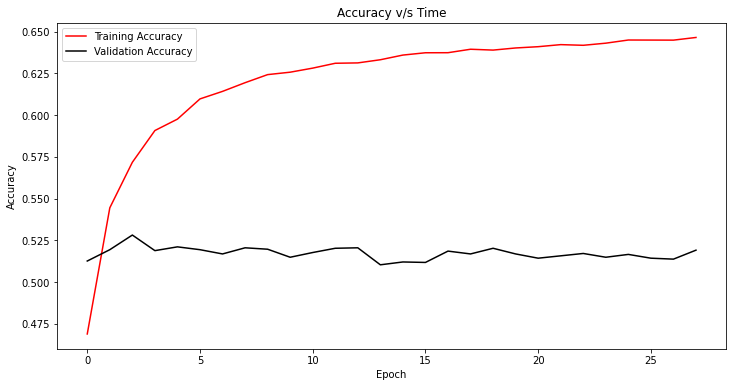

In [ ]:
plt.figure(figsize=(12,6))
epochs = len(history.history['binary_accuracy'])
plt.plot(range(epochs),history.history['binary_accuracy'],label='Training Accuracy',color='r')
plt.plot(range(epochs),history.history['val_binary_accuracy'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

#Creating Model

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model=LogisticRegression()#Logistic Regression Model

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# model=KNeighborsClassifier()#K-Nearest Neighbour Model

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# model=DecisionTreeClassifier()#Decision Tree Model

In [ ]:
# from sklearn.svm import SVC 
# model=SVC() #Support Vector Machine

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model=RandomForestClassifier(n_estimators=200)

#Training Model

In [ ]:
model.fit(X_train,y_train)

NameError: ignored

#Prediction Model

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred.shape

In [ ]:
y_pred

#Accuracy

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred)

NameError: ignored

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
accuracy_score(y_test,y_pred)

NameError: ignored

#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features=np.arange(1,100,1)
n_estimators=np.arange(10,1000,10)
param_grid=dict(max_features=max_f,n_estimators=n_est)

grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
print("The best parameters are %s with a score %.2f"%(grid.best_params_,grid.best_score_))

Plots

In [ ]:
grid_results=pd.concat([pd.DataFrame(grid.cv_results_['params']),pd.DataFrame(grid.cv_results_['mean_test_score'])])

In [ ]:
grid_contour=grid_results.groupby(['max_features', 'n_estimators']).mean()

In [ ]:
grid_reset=grid_contour.resent_index()
grid_reset.columns=['max_features', 'n_estimators', 'Accuracy']
grid_pivot=grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

In [ ]:
x=grid_pivot.columns.levels[1].values
y=grid_pivot.index.values
z=grid_pivot.values

2D Contour Plot

In [ ]:
import plotly.graph_objects as go

layout=go.layout(
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='max_features')
        ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='n_estimators')))

fig=go.Figure(data=[go.Contour(z=z,x=x,y=y)],layout=layout)
fig.update_layout(title='Hyperarameter Tuning', autosize=False,
                  width=500, height=500, margin=dict(l=65, r=50, b=65, t=90))

fig.show()

TypeError: ignored

3D Surface Plot

In [ ]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Surface(z=z,y=y,x=x)],layout=layout)
fig.update_layout(title='Hyperparameter Tuning',
                  scene=dict(
                      xaxis_title='n_estimators',
                      yaxis_title='max_features',
                      zaxis_title='Accuracy'),
                  autosize=False,
                  width=500, heigth=500,
                  margin=dict(l=65,r=50,b=65,t=90))
fig.show()

#ANN

In [ ]:
X.shape

In [ ]:
X_train.shape,y_train.shape

In [ ]:
i=tf.keras.Input(shape=(X.shape[1],))
x=tf.keras.layers.Dense(512,activation='relu')(i)
x=tf.keras.layers.Dense(128,activation='relu')(x)
o=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model=tf.keras.Model(i,o)

model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=1,from_logits=False),optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy()])

epochs=101
history=model.fit(X_train,y_train,batch_size=1500,epochs=epochs,callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],validation_data=(X_test,y_test))

In [ ]:
model.summary()

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(epochs),history.history['accuracy'],label='Training Accuracy',color='r')
plt.plot(range(epochs),history.history['val_accuracy'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

#CNN

In [ ]:
X_train[0].shape

In [ ]:
# Hyperparameters
embedding_dim = 128
lstm1_dim = 128
lstm2_dim = 128
dense_dim = 64
gru_dim=64
filters = 128
kernel_size = 5
dense_dim = 6

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,128,input_length=X.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Dropout(0.20),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=False)),
    # tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim, return_sequences=False)),
    tf.keras.layers.Dropout(0.20),
    # tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    # tf.keras.layers.GlobalAveragePooling1D(),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    # tf.keras.layers.GlobalAveragePooling1D(),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    # tf.keras.layers.Dropout(0.40),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=1,from_logits=False),optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy()])

model.summary()

Training

In [ ]:
epochs=101
history=model.fit(X_train, y_train, epochs=epochs, batch_size = 1500,validation_data=(X_test,y_test),callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    min_delta=0,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)])

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
plt.figure(figsize=(12,6))
epochs = len(history.history['binary_accuracy'])
plt.plot(range(epochs),history.history['binary_accuracy'],label='Training Accuracy',color='r')
plt.plot(range(epochs),history.history['val_binary_accuracy'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

In [ ]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,128,input_length=X.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Dropout(0.20),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=False)),
    # tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim, return_sequences=False)),
    tf.keras.layers.Dropout(0.20),
    # tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    # tf.keras.layers.GlobalAveragePooling1D(),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    # tf.keras.layers.GlobalAveragePooling1D(),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    # tf.keras.layers.Dropout(0.40),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1,activation='sigmoid')])
    return model
# fix random seed for reproducibility
seed = 7
import numpy as np
np.random.seed(seed)
# create model
# from scikeras.wrappers import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0, epochs=100, batch_size=10)
# define the grid search parameters
param_grid = {
    'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],
    'batch_size': [10, 20, 40, 60, 80, 100],
    'epochs': [10, 50, 100],
    'learn_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'momentum': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9],
    'init_mode': ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],
    'activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
    'weight_constraint': [1, 2, 3, 4, 5],
    'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'neurons': [1, 5, 10, 15, 20, 25, 30]
    
}

# Instantiate the grid search model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                      cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

# Fit the grid search to the data
grid_result = grid_search.fit(X_train, y_train);

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))